In [92]:
#impoted all the required library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [93]:
#import the csv file(dataset) which i have got from kaggle.
data = pd.read_csv('austin_weather.csv')

In [94]:
data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,


In [95]:
#Here as you can see the datatype of some features are object so we have to convert them into integer or float.

data.dtypes

Date                          object
TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                 object
DewPointAvgF                  object
DewPointLowF                  object
HumidityHighPercent           object
HumidityAvgPercent            object
HumidityLowPercent            object
SeaLevelPressureHighInches    object
SeaLevelPressureAvgInches     object
SeaLevelPressureLowInches     object
VisibilityHighMiles           object
VisibilityAvgMiles            object
VisibilityLowMiles            object
WindHighMPH                   object
WindAvgMPH                    object
WindGustMPH                   object
PrecipitationSumInches        object
Events                        object
dtype: object

In [96]:
#Replacing '-' and 'T' into Null(NaN) value.

data = data.replace(to_replace=['-','T'], value= '')

In [97]:
 #Converted the datatype into numeric.
    
    data[['DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches', 'VisibilityHighMiles', 
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'PrecipitationSumInches']] =  data[['DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent',
                                                                                                                                   'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches', 'VisibilityHighMiles', 
                                                                                                                                   'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'PrecipitationSumInches']].apply(pd.to_numeric)                    

In [98]:
data.dtypes

Date                           object
TempHighF                       int64
TempAvgF                        int64
TempLowF                        int64
DewPointHighF                 float64
DewPointAvgF                  float64
DewPointLowF                  float64
HumidityHighPercent           float64
HumidityAvgPercent            float64
HumidityLowPercent            float64
SeaLevelPressureHighInches    float64
SeaLevelPressureAvgInches     float64
SeaLevelPressureLowInches     float64
VisibilityHighMiles           float64
VisibilityAvgMiles            float64
VisibilityLowMiles            float64
WindHighMPH                   float64
WindAvgMPH                    float64
WindGustMPH                   float64
PrecipitationSumInches        float64
Events                         object
dtype: object

In [99]:
#Total number of Null value per column contains.

data.isnull().sum()

Date                            0
TempHighF                       0
TempAvgF                        0
TempLowF                        0
DewPointHighF                   7
DewPointAvgF                    7
DewPointLowF                    7
HumidityHighPercent             2
HumidityAvgPercent              2
HumidityLowPercent              2
SeaLevelPressureHighInches      3
SeaLevelPressureAvgInches       3
SeaLevelPressureLowInches       3
VisibilityHighMiles            12
VisibilityAvgMiles             12
VisibilityLowMiles             12
WindHighMPH                     2
WindAvgMPH                      2
WindGustMPH                     4
PrecipitationSumInches        124
Events                          0
dtype: int64

In [100]:
data.dropna(inplace=True)

In [101]:
#converted date into datetime

data['Date'] = pd.to_datetime(data['Date'])

In [102]:
data.dtypes

Date                          datetime64[ns]
TempHighF                              int64
TempAvgF                               int64
TempLowF                               int64
DewPointHighF                        float64
DewPointAvgF                         float64
DewPointLowF                         float64
HumidityHighPercent                  float64
HumidityAvgPercent                   float64
HumidityLowPercent                   float64
SeaLevelPressureHighInches           float64
SeaLevelPressureAvgInches            float64
SeaLevelPressureLowInches            float64
VisibilityHighMiles                  float64
VisibilityAvgMiles                   float64
VisibilityLowMiles                   float64
WindHighMPH                          float64
WindAvgMPH                           float64
WindGustMPH                          float64
PrecipitationSumInches               float64
Events                                object
dtype: object

In [103]:
#splitting the date into year and month

data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month

In [104]:
data.drop(columns='Date',inplace = True)

<AxesSubplot:xlabel='Month'>

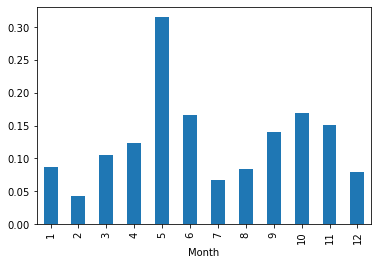

In [105]:
#EDA - A little bit of data analysis.
# In the bar graph it's showing how much 'PrecipitationSumInches' per month.

data.groupby('Month').mean()['PrecipitationSumInches'].plot(kind = 'bar')

<AxesSubplot:xlabel='Month', ylabel='PrecipitationSumInches'>

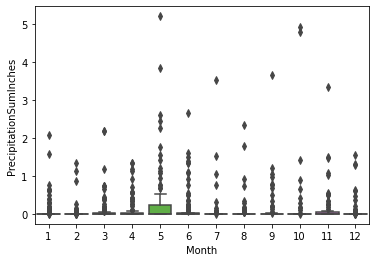

In [106]:
sb.boxplot(data['Month'],data['PrecipitationSumInches'])

In [107]:
#Creating dependent and independent variable.

X = data.drop(columns=['PrecipitationSumInches','Events','Year'])
y = data['PrecipitationSumInches']

# reshaping it into a 2-D vector
y = y.values.reshape(-1, 1)

In [108]:
#Splitting the data into training and test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
#Implementing Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [110]:
#predicted value of test set.
y_pred = regressor.predict(X_test)
print(y_pred)

[[ 0.24730079]
 [ 0.03355484]
 [-0.0209254 ]
 [ 0.05774798]
 [-0.139001  ]
 [-0.04875753]
 [-0.10861193]
 [ 0.10237896]
 [ 0.71869373]
 [-0.08894478]
 [-0.13130656]
 [-0.1356049 ]
 [-0.29977662]
 [ 0.04237695]
 [ 1.11943095]
 [ 0.26819554]
 [-0.1183411 ]
 [-0.14642397]
 [ 0.34786303]
 [ 0.0780793 ]
 [ 0.19593933]
 [ 0.0707203 ]
 [ 0.17883971]
 [ 0.25308217]
 [ 0.08030344]
 [ 0.3925434 ]
 [-0.00414399]
 [-0.01871683]
 [ 0.12603668]
 [ 0.61320167]
 [ 0.056229  ]
 [-0.16179056]
 [-0.180291  ]
 [ 0.09483413]
 [-0.06740375]
 [ 0.00379859]
 [-0.1099102 ]
 [-0.03328483]
 [ 0.16599277]
 [ 0.351353  ]
 [ 0.12776866]
 [ 0.24482738]
 [ 0.02322388]
 [-0.01299567]
 [-0.02259961]
 [-0.258601  ]
 [ 0.01188318]
 [ 0.33030861]
 [ 0.20118294]
 [ 0.13554509]
 [ 0.88347602]
 [ 0.17135681]
 [ 0.16785375]
 [ 0.05787954]
 [ 0.02056021]
 [-0.06501599]
 [ 0.52808453]
 [ 0.08653169]
 [-0.22177192]
 [ 0.44034048]
 [ 0.0653199 ]
 [-0.18960532]
 [ 0.10302929]
 [-0.21305911]
 [-0.01641653]
 [-0.09056602]
 [ 0.03930

In [112]:
#Evaluating Regression model performance.

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.42453712249385045

In [113]:
weather = pd.DataFrame(data = (zip(y_test,y_pred)),columns=['Actual','Predicted'])
weather

,Actual,Predicted
0,[0.36],[0.24730079006422945]
1,[0.0],[0.033554842003790775]
2,[0.0],[-0.020925397075363783]
3,[0.0],[0.05774797522775499]
4,[0.0],[-0.13900100366007018]
...,...,...
232,[1.56],[0.5624155292036577]
233,[0.0],[0.04404660680453243]
234,[0.0],[-0.10779366170895455]
235,[0.0],[0.0217835757547995]
